# Stellar Transient Populations 🔍

In this notebook, we will cover:

1. Selecting binaries and combining metallicities
2. Exploring the `TransientPopulation` class
3. Calculating cosmic rates

We will do this in the context of the merging binary black hole population.


----

## Creating multi-metallicity Populations


<div class="alert alert-warning"><b>Reprocessed POSYDON v1 dataset</b> 

Please note that with the reprocessed POSYDON v1 data, only solar metallicity is available.
You will not be able to follow along with the full tutorial!
If you would still like to explore a population at solar metallicity, you can follow the [One metallicity tutorial](one_met_pop_syn.ipynb).

</div>

In the previous tutorial, you generated 8 population files, each at a different metallicity, with 1,000 binaries in each file.
Since this is a small population of only 8,000 binaries in total, you can explore the complete population.
However, the larger your population gets, the better it is to select a subset of the population to minimize memory usage.

In this tutorial we will select the subset of the population that ends in a binary black hole merger.
For each population file, we will export these binaries into a new file.
For this, we need to find the indices of the merging binaries. The relevant conditions are that the properties S1_state and S2_state equal 'BH', while the binary has the `event == 'CO_contact'`.

We will load one of the population files to build our merging binaries selection.



<div class="alert alert-warning"><b>No indices?</b> 

It might be that the population you generated does not contain any merging BBHs, they're rare after all.
You can download an example population, which contains 10,000 binaries at each of the 8 metallicities.

```get-posydon-data v2_tutorial_populations```

This automatically downloads the tutorial populations from [Zenodo](https://zenodo.org/communities/posydon) into `$PATH_TO_POSYDON_DATA/../tutorial_populations`
</div>


In [ ]:
from posydon.config import PATH_TO_POSYDON_DATA
from posydon.popsyn.synthetic_population import Population

# change the path to $PATH_TO_POSYDON_DATA/tutorial_populations/1e+00_Zsun_population.h5
# when using the example population file.
pop = Population(f'{PATH_TO_POSYDON_DATA}/../tutorial_populations/1e+00_Zsun_population.h5') 
tmp_data = pop.history.select(columns=['S1_state', 'S2_state', 'event'])


Note: `pop.history.select` is a read operation on the population file and can take quite a lot of time if the population is large.

We will now select only the relevant columns in this file. If you have sufficient memory, it is more efficient to select several columns at the same time instead of selecting a single column each time.

In [6]:
# Selection of S1 being a BH
S1_state = tmp_data['S1_state'] == 'BH'
# Selection of S2 being a BH
S2_state = tmp_data['S2_state'] == 'BH'
# Selection of the binary system being in contact during the double CO phase.
state = tmp_data['event'] == 'CO_contact'

# get the indices of all systems
indices = tmp_data.index

# delete the temporary data
del tmp_data

# get a mask for the indices that satisfy all the conditions
mask = S1_state & S2_state & state

# get the indices that satisfy all the conditions
selected_indices = indices[mask].to_list()

The `selected_indices` has to be a list for the selection to work correctly.

You can test your selection by doing the following:

In [7]:
print(selected_indices)
pop.history[selected_indices]

[1782, 4169, 5178, 5185, 5213, 5389, 7585, 7911, 9288]


,state,event,time,orbital_period,eccentricity,lg_mtransfer_rate,step_names,step_times,S1_state,S1_mass,...,S2_he_core_mass,S2_he_core_radius,S2_co_core_mass,S2_co_core_radius,S2_center_h1,S2_center_he4,S2_surface_h1,S2_surface_he4,S2_surf_avg_omega_div_omega_crit,S2_spin
binary_index,,,,,,,,,,,,,,,,,,,,,
1782,detached,ZAMS,0.000000e+00,3.016721e+00,0.000000,NaN,initial_cond,0.000000,H-rich_Core_H_burning,54.192306,...,NaN,NaN,NaN,NaN,7.155000e-01,2.703000e-01,NaN,NaN,NaN,NaN
1782,detached,CC1,4.798034e+06,7.014097e+00,0.000000,-89.609417,step_HMS_HMS,0.107596,stripped_He_Central_C_depletion,11.954023,...,0.000000,0.000000,0.000000,0.000000,2.674591e-01,7.186758e-01,6.875565e-01,0.298318,0.257312,2.620382
1782,detached,NaN,4.798034e+06,1.049794e+01,0.252045,NaN,step_SN,0.000380,BH,10.507682,...,0.000000,0.000000,0.000000,0.000000,2.674591e-01,7.186758e-01,6.875565e-01,0.298318,0.257312,2.620382
1782,RLO2,oRLO2,5.619616e+06,7.130116e+00,0.000000,NaN,step_detached,0.273647,BH,10.507682,...,0.000000,NaN,0.000000,0.000000,1.270250e-01,8.591231e-01,7.154999e-01,0.270271,0.281997,3.001309
1782,detached,CC2,6.860419e+06,5.025562e+00,0.000000,-99.000000,step_CO_HMS_RLO,0.057863,BH,10.596515,...,8.918467,0.397615,7.669779,0.108616,3.908961e-17,4.999407e-13,6.877728e-17,0.614822,0.066216,0.129134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9288,detached,NaN,4.820170e+06,1.817583e+00,0.369272,NaN,step_SN,0.049869,BH,8.278226,...,10.485024,NaN,9.050020,0.208476,0.000000e+00,1.744561e-15,9.994973e-100,0.266261,0.001022,0.008431
9288,detached,CC2,4.823566e+06,1.824024e+00,0.369272,NaN,step_detached,0.349666,BH,8.278226,...,10.463360,NaN,9.380817,0.125142,0.000000e+00,4.293960e-13,7.487441e-68,0.262188,0.002014,0.008089
9288,detached,NaN,4.823566e+06,1.572325e+00,0.580381,NaN,step_SN,0.050675,BH,8.278226,...,NaN,NaN,9.380817,NaN,NaN,NaN,NaN,NaN,NaN,0.005728


If your selected indices are empty, no BBH mergers occurred in your population. They're quite rare after all!

Let's use an example set of populations to make sure there will be BBHs in your population.

**This can only be used with the multi-metallicity populations!**

In [9]:
from posydon.popsyn.synthetic_population import Population

# Change the path to the data you want to use
# or the path to the tutorial data: # $PATH_TO_POSYDON_DATA/tutorial_populations/
data_path = f'{PATH_TO_POSYDON_DATA}/tutorial_populations/'
# change to PATH_TO_POSYDON_DATA/tutorial_populations/ for the tutorial data
# and add "from posydon.config import PATH_TO_POSYDON_DATA" to the imports above

# Let's load one of the populations
pop = Population(data_path+'1e-01_Zsun_population.h5')

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


In [10]:
pop.oneline.columns

['state_i',
 'event_i',
 'time_i',
 'orbital_period_i',
 'eccentricity_i',
 'lg_mtransfer_rate_i',
 'step_names_i',
 'step_times_i',
 'state_f',
 'event_f',
 'time_f',
 'orbital_period_f',
 'eccentricity_f',
 'lg_mtransfer_rate_f',
 'step_names_f',
 'step_times_f',
 'S1_state_i',
 'S1_mass_i',
 'S1_log_R_i',
 'S1_log_L_i',
 'S1_lg_mdot_i',
 'S1_he_core_mass_i',
 'S1_he_core_radius_i',
 'S1_co_core_mass_i',
 'S1_co_core_radius_i',
 'S1_center_h1_i',
 'S1_center_he4_i',
 'S1_surface_h1_i',
 'S1_surface_he4_i',
 'S1_surf_avg_omega_div_omega_crit_i',
 'S1_spin_i',
 'S1_state_f',
 'S1_mass_f',
 'S1_log_R_f',
 'S1_log_L_f',
 'S1_lg_mdot_f',
 'S1_he_core_mass_f',
 'S1_he_core_radius_f',
 'S1_co_core_mass_f',
 'S1_co_core_radius_f',
 'S1_center_h1_f',
 'S1_center_he4_f',
 'S1_surface_h1_f',
 'S1_surface_he4_f',
 'S1_surf_avg_omega_div_omega_crit_f',
 'S1_spin_f',
 'S1_natal_kick_array_0',
 'S1_natal_kick_array_1',
 'S1_natal_kick_array_2',
 'S1_natal_kick_array_3',
 'S1_SN_type',
 'S1_f_fb',
 

We don’t just want to find the BBH mergers at a single metallicity. We want to export them for each metallicity file. As such, we loop over each Population file and export all the BBH mergers to a new file. It’s important that the Population files have the same columns, otherwise it’s not possible to append them.

The indices of the binaries will be reset, when being exported, such that the new file contains unique indices for each binary.

In [11]:
from posydon.popsyn.synthetic_population import Population

# The names of the populations, if you followed along.
files = ['1e-01_Zsun_population.h5',
         '1e-02_Zsun_population.h5',
         '1e-03_Zsun_population.h5',
         '1e-04_Zsun_population.h5',
         '1e+00_Zsun_population.h5',
         '2e-01_Zsun_population.h5',
         '2e+00_Zsun_population.h5',
         '4.5e-01_Zsun_population.h5']


for file in files:
    pop = Population(data_path+file)
    # read the relevant data in one go
    # (faster than reading it in chunks, but requires more memory)
    tmp_data = pop.history.select(columns=['S1_state', 'S2_state', 'event'])
    # Selection of S1 being a BH
    S1_state = tmp_data['S1_state'] == 'BH'
    # Selection of S2 being a BH
    S2_state = tmp_data['S2_state'] == 'BH'
    # Selection of the binary system being in contact during the double CO phase.
    state = tmp_data['event'] == 'CO_contact'
    indices = tmp_data.index
    del tmp_data
    mask = S1_state & S2_state & state
    selected_indices = indices[mask].to_list()
    print(f'File: {file}, Number of systems: {len(selected_indices)}')
    
    # set overwrite to False to add to the file
    pop.export_selection(selected_indices, 'BBH_contact.h5', append=True)

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max
File: 1e-01_Zsun_population.h5, Number of systems: 31
Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max
Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max
File: 1e-02_Zsun_population.h5, Number of systems: 84
Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max
Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max
File: 1e-03_Zsun_population.h5, Number of systems: 139
Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separa

If your population did not contain any BBH mergers, all the "Number of Systems" will be 0, and you won't be able to open the file in the next cell.

If you ran the population with the tutorial populations, you should have a total of 483 merging BBHs.

We can confirm the number of BBH mergers by adding up the values above. Alternatively, we can open the new file, BBH_contact.h5, and use `Population.number_of_systems` to get the total number of binaries in the file. 

Additionally, you now see that the `mass_per_metallicity` property contains information about all the metallicities in the file.

You can even combine multiple runs at the same metallicity together, if you like. This will combine their simulated mass.

In [12]:
from posydon.popsyn.synthetic_population import Population
BBH_pop = Population('BBH_contact.h5', chunksize=10000)
print(BBH_pop.number_of_systems)

BBH_pop.mass_per_metallicity

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max
484


,simulated_mass,simulated_mass_single,simulated_mass_binaries,number_of_systems
metallicity,,,,
0.0001,280043.161844,0.0,280043.161844,183
0.0010,283894.053648,0.0,283894.053648,139
0.0100,284537.136965,0.0,284537.136965,84
0.1000,282418.194591,0.0,282418.194591,31
0.2000,283263.654920,0.0,283263.654920,10
0.4500,289041.274966,0.0,289041.274966,16
1.0000,281360.871267,0.0,281360.871267,9
2.0000,288865.926454,0.0,288865.926454,12



-----

## Transient population

Although we now have selected all binaries with a BBH merger, we don't have the exact moment of the merger yet.
This will be required to calculate merger rates across cosmic time.


For this, we will create a `TransientPopulation`.
This class is used to hold information about a specific event/moment in time.
In our case, this is the moment of "CO_contact", the moment of the BBH merger.
However, we might want to store and calculate some additional values, such as the $M_\mathrm{chirp}$ or $\chi_\mathrm{eff}$.

The `Population` class has a function `create_transient_population` (see [here for more details](../../api_reference/posydon.popsyn.rst#posydon.popsyn.synthetic_population.Population.create_transient_population)).
In short, it takes a `selection_function` and a `transient_name`.
The `transient_name` is a string identifying the transient population in the file,
while `selection_function` extracts the `TransientPopulation` for us.
This can be any custom function you want it to be, as long as it outputs a pandas DataFrame with a 'time' and 'metallicity' column.

Several selection functions are provided in `posydon.popsyn.transient_select_funcs`:

1. [BBH_selection_function](../../api_reference/posydon.popsyn.rst#posydon.popsyn.transient_select_funcs.BBH_selection_function)
2. [GRB_selection_function](../../api_reference/posydon.popsyn.rst#posydon.popsyn.transient_select_funcs.GRB_selection)

We have copied part of the `BBH_selection_function` below to explain how a `selection_function` works.

In [14]:
import pandas as pd
def BBH_selection_function(history_chunk, oneline_chunk, formation_channels_chunk=None):
    '''A BBH selection function to create a transient population of BBHs mergers.'''
    
    indices = oneline_chunk.index.to_numpy()
    df_transients = pd.DataFrame(index = indices)
    
    df_transients['time'] = history_chunk[history_chunk['event'] == 'CO_contact']['time'] * 1e-6 #Myr
    df_transients['metallicity'] = oneline_chunk['metallicity']

    return df_transients

A `selection_function` always has as an input a chunk of the history, oneline, and formation_pathways (optional). For example, you set your `chunksize=10000` when you initialise the `Population`, like we've done above for `BBH_pop`, each chunk will contain 10,000 binaries.
This means that the complete history, oneline and formation_pathways of those 10,000 binaries are passed to this function.

The `BBH_selection_function` selects the moment the binary reaches CO_contact as the moment of merger, and stores it in the `time` column in Myr.
The `metallicity` is also outputted, since this will be essential when combining it with the star formation history.

We can test this function by inputting a single binary into it, as done below.
If you've used the example populations, you might not have calculated the formation_channels yet. We will set that input to None.

In [15]:
BBH_selection_function(BBH_pop.history[0], BBH_pop.oneline[0], None)

,time,metallicity
0,941.625681,0.1


This gives us a DataFrame containing our 1 binary, its index (0), the moment of merger, and its metallicity.

Of course, we would like to know a bit more about our merger than just when it occurs.
Let's expand our output with the BH masses, their spin, their tilt, and the orbital period at DCO formation.

In [16]:
def BBH_selection_function(history_chunk, oneline_chunk, formation_channels_chunk):
    '''A BBH selection function to create a transient population of BBHs mergers.'''
    
    indices = oneline_chunk.index.to_numpy()
    df_transients = pd.DataFrame(index = indices)
    
    df_transients['time'] = history_chunk[history_chunk['event'] == 'CO_contact']['time'] * 1e-6 #Myr
    df_transients['metallicity'] = oneline_chunk['metallicity']
    
    # Added properties
    mask = (history_chunk['S1_state'] == 'BH') & (history_chunk['S2_state'] == 'BH') & (history_chunk['step_names'] == 'step_SN') & (history_chunk['state'] == 'detached')
    df_transients['t_inspiral'] = df_transients['time'] - history_chunk[mask]['time']*1e-6
    df_transients['S1_state']  = history_chunk[mask]['S1_state']
    df_transients['S2_state']  = history_chunk[mask]['S2_state']
    df_transients['S1_mass'] = history_chunk[mask]['S1_mass']
    df_transients['S2_mass'] = history_chunk[mask]['S2_mass']
    df_transients['S1_spin'] = history_chunk[mask]['S1_spin']
    df_transients['S2_spin'] = history_chunk[mask]['S2_spin']
    # we distinguish the tilt of the spin to the orbit after the first and second SN.
    df_transients['S1_spin_orbit_tilt_merger'] = oneline_chunk['S1_spin_orbit_tilt_second_SN']
    df_transients['S2_spin_orbit_tilt_merger'] = oneline_chunk['S2_spin_orbit_tilt_second_SN']
    df_transients['orbital_period'] = history_chunk[mask]['orbital_period']
    
    return df_transients

In [17]:
BBH_selection_function(BBH_pop.history[0], BBH_pop.oneline[0], None)

,time,metallicity,t_inspiral,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,S1_spin_orbit_tilt_merger,S2_spin_orbit_tilt_merger,orbital_period
0,941.625681,0.1,934.85865,BH,BH,20.255909,11.056556,0.000154,0.069232,0.077081,0.021642,1.138191


With this new function, we have a lot more information available in the TransientPopulation.

You can further customize this to your liking, if you want to store specific information.
It's also possible to calculate additional information based on any value in the history, oneline or formation_channels.

We will import some functions to calculate $\chi_\mathrm{eff}$, $q$ and $\mathcal{M}_\mathrm{chirp}$ and also add them to the DataFrame.


In [18]:
from posydon.popsyn.transient_select_funcs import chi_eff, mass_ratio, m_chirp

def BBH_selection_function(history_chunk, oneline_chunk, formation_channels_chunk):
    '''A BBH selection function to create a transient population of BBHs mergers.'''
    
    indices = oneline_chunk.index.to_numpy()
    df_transients = pd.DataFrame(index = indices)
    
    df_transients['time'] = history_chunk[history_chunk['event'] == 'CO_contact']['time'] * 1e-6 #Myr
    mask = (history_chunk['S1_state'] == 'BH') & (history_chunk['S2_state'] == 'BH') & (history_chunk['step_names'] == 'step_SN') & (history_chunk['state'] == 'detached')
    df_transients['metallicity'] = oneline_chunk['metallicity']
    df_transients['t_inspiral'] = df_transients['time'] - history_chunk[mask]['time']*1e-6
    
    df_transients['S1_state']  = history_chunk[mask]['S1_state']
    df_transients['S2_state']  = history_chunk[mask]['S2_state']
    df_transients['S1_mass'] = history_chunk[mask]['S1_mass']
    df_transients['S2_mass'] = history_chunk[mask]['S2_mass']
    df_transients['S1_spin'] = history_chunk[mask]['S1_spin']
    df_transients['S2_spin'] = history_chunk[mask]['S2_spin']
    # we distinguish the tilt of the spin to the orbit after the first and second SN.
    df_transients['S1_spin_orbit_tilt_merger'] = oneline_chunk['S1_spin_orbit_tilt_second_SN']
    df_transients['S2_spin_orbit_tilt_merger'] = oneline_chunk['S2_spin_orbit_tilt_second_SN']
    df_transients['orbital_period'] = history_chunk[mask]['orbital_period']
    df_transients['eccentricity'] = history_chunk[mask]['eccentricity']
    
    # Added
    df_transients['chirp_mass'] = m_chirp(history_chunk[mask]['S1_mass'], history_chunk[mask]['S2_mass'])
    df_transients['mass_ratio'] = mass_ratio(history_chunk[mask]['S1_mass'], history_chunk[mask]['S2_mass'])
    df_transients['chi_eff'] = chi_eff(history_chunk[mask]['S1_mass'],
                                       history_chunk[mask]['S2_mass'],
                                       history_chunk[mask]['S1_spin'],
                                       history_chunk[mask]['S2_spin'],
                                       oneline_chunk['S1_spin_orbit_tilt_second_SN'],
                                       oneline_chunk['S2_spin_orbit_tilt_second_SN'])
    
    return df_transients

In [19]:
BBH_selection_function(BBH_pop.history[0], BBH_pop.oneline[0], None)

,time,metallicity,t_inspiral,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,S1_spin_orbit_tilt_merger,S2_spin_orbit_tilt_merger,orbital_period,eccentricity,chirp_mass,mass_ratio,chi_eff
0,941.625681,0.1,934.85865,BH,BH,20.255909,11.056556,0.000154,0.069232,0.077081,0.021642,1.138191,0.011172,12.910989,0.545843,0.024539


Before running this selection on the whole population, we would like to include the `formation_channels` too.
These are calculated for the systems in the population file and add a good overview of the evolution of binaries.

In [20]:
# mt_history=True adds detailed information about the mass transfer in the HMS-HMS grid
BBH_pop.calculate_formation_channels(mt_history=True)

Now we can include the formation_channels in `df_transients`.

In [21]:
def BBH_selection_function(history_chunk, oneline_chunk, formation_channels_chunk):
    '''A BBH selection function to create a transient population of BBHs mergers.'''
    
    indices = oneline_chunk.index.to_numpy()
    df_transients = pd.DataFrame(index = indices)
    
    df_transients['time'] = history_chunk[history_chunk['event'] == 'CO_contact']['time'] * 1e-6 #Myr
    mask = (history_chunk['S1_state'] == 'BH') & (history_chunk['S2_state'] == 'BH') & (history_chunk['step_names'] == 'step_SN') & (history_chunk['state'] == 'detached')
    df_transients['metallicity'] = oneline_chunk['metallicity']
    df_transients['t_inspiral'] = df_transients['time'] - history_chunk[mask]['time']*1e-6
    
    df_transients['S1_state']  = history_chunk[mask]['S1_state']
    df_transients['S2_state']  = history_chunk[mask]['S2_state']
    df_transients['S1_mass'] = history_chunk[mask]['S1_mass']
    df_transients['S2_mass'] = history_chunk[mask]['S2_mass']
    df_transients['S1_spin'] = history_chunk[mask]['S1_spin']
    df_transients['S2_spin'] = history_chunk[mask]['S2_spin']
    # we distinguish the tilt of the spin to the orbit after the first and second SN.
    df_transients['S1_spin_orbit_tilt_merger'] = oneline_chunk['S1_spin_orbit_tilt_second_SN']
    df_transients['S2_spin_orbit_tilt_merger'] = oneline_chunk['S2_spin_orbit_tilt_second_SN']
    df_transients['orbital_period'] = history_chunk[mask]['orbital_period']
    df_transients['eccentricity'] = history_chunk[mask]['eccentricity']
    
    df_transients['chirp_mass'] = m_chirp(history_chunk[mask]['S1_mass'], history_chunk[mask]['S2_mass'])
    df_transients['mass_ratio'] = mass_ratio(history_chunk[mask]['S1_mass'], history_chunk[mask]['S2_mass'])
    df_transients['chi_eff'] = chi_eff(history_chunk[mask]['S1_mass'],
                                       history_chunk[mask]['S2_mass'],
                                       history_chunk[mask]['S1_spin'],
                                       history_chunk[mask]['S2_spin'],
                                       oneline_chunk['S1_spin_orbit_tilt_second_SN'],
                                       oneline_chunk['S2_spin_orbit_tilt_second_SN'])
    
    # added
    df_transients = pd.concat([df_transients, formation_channels_chunk[['channel']]], axis=1)    
    
    return df_transients


In [22]:
# NOTE: the formation channels have to be given as a dataframe, as such we call it with loc[[0]] for testing
# Make sure you use double brackets for loc to return a dataframe
BBH_selection_function(BBH_pop.history[0],
                       BBH_pop.oneline[0],
                       BBH_pop.formation_channels.loc[[0]])

,time,metallicity,t_inspiral,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,S1_spin_orbit_tilt_merger,S2_spin_orbit_tilt_merger,orbital_period,eccentricity,chirp_mass,mass_ratio,chi_eff,channel
0,941.625681,0.1,934.85865,BH,BH,20.255909,11.056556,0.000154,0.069232,0.077081,0.021642,1.138191,0.011172,12.910989,0.545843,0.024539,ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END


The example binary gives us a dataframe with all the information we're interested in. But if something is missing feel free to customize the selection further!

We now create a `TransientPopulation` instance with the `BBH_selection_function` and `create_transient_population`.

This will write the transient population to the current file.

`BBH_mergers.population` will load the complete dataframe we've just created. Each of the indices in this population refer back to the original binaries, which are still accessible through `BBH_mergers.history` or `BBH_mergers.oneline`.

In [23]:
BBH_mergers = BBH_pop.create_transient_population(BBH_selection_function, 'BBH')

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


In [24]:
BBH_mergers.population

,time,metallicity,t_inspiral,S1_state,S2_state,S1_mass,S2_mass,S1_spin,S2_spin,S1_spin_orbit_tilt_merger,S2_spin_orbit_tilt_merger,orbital_period,eccentricity,chirp_mass,mass_ratio,chi_eff,channel
0,941.625681,0.10,934.858650,BH,BH,20.255909,11.056556,0.000154,0.069232,0.077081,0.021642,1.138191,0.011172,12.910989,0.545843,0.024539,ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END
1,3522.078839,0.10,3515.399327,BH,BH,19.036581,11.605055,0.000510,0.030707,0.046212,-0.026706,2.043143,0.254215,12.861135,0.609619,0.011942,ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END
2,4667.120765,0.10,4659.979602,BH,BH,20.537148,9.562439,0.000414,0.002671,0.088318,-0.074232,1.993609,0.043748,12.026885,0.465617,0.001127,ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END
3,510.804447,0.10,506.316944,BH,BH,31.396403,18.983910,0.078011,0.089558,0.049816,0.027870,1.243958,0.091028,21.120644,0.604652,0.082288,ZAMS_oDoubleCE1_CC1_CC2_END
4,6903.781066,0.10,6894.095674,BH,BH,22.910135,23.321383,0.169478,0.184344,0.008050,-0.016003,3.181082,0.031320,20.122482,0.982366,0.176963,ZAMS_oRLO1-contact_CC1_oRLO2_CC2_END
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,1192.026090,0.45,1183.961805,BH,BH,12.139577,4.244587,0.002971,0.052579,0.177201,0.063283,0.834729,0.226139,6.086092,0.349649,0.015761,ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END
480,299.021358,0.45,289.315942,BH,BH,8.377082,2.573495,0.002887,0.001287,0.434337,0.363347,1.495665,0.822144,3.910950,0.307207,0.002286,ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END
481,2474.868155,0.45,2465.219295,BH,BH,8.345352,5.063525,0.024993,0.044451,1.666056,-1.741610,5.868311,0.867166,5.624192,0.606748,-0.004333,ZAMS_oRLO1_CC1_oRLO2_CC2_END
482,2508.217005,0.45,2499.796781,BH,BH,19.818801,6.160067,0.004538,0.000034,0.146813,-0.094479,2.136495,0.542485,9.312658,0.310819,0.003433,ZAMS_oRLO1_CC1_oRLO2_oCE2_CC2_END


Since the Transient Population is stored in the same file, you can continue your analysis by opening the file using the `TransientPopulation` class.
You only need to do your selection once and you can then continue from this stage.

In [25]:
from posydon.popsyn.synthetic_population import TransientPopulation

BBH_mergers = TransientPopulation(filename='BBH_contact.h5', transient_name='BBH')

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


In [26]:
BBH_mergers.mass_per_metallicity

,simulated_mass,simulated_mass_single,simulated_mass_binaries,number_of_systems
metallicity,,,,
0.0001,280043.161844,0.0,280043.161844,183
0.0010,283894.053648,0.0,283894.053648,139
0.0100,284537.136965,0.0,284537.136965,84
0.1000,282418.194591,0.0,282418.194591,31
0.2000,283263.654920,0.0,283263.654920,10
0.4500,289041.274966,0.0,289041.274966,16
1.0000,281360.871267,0.0,281360.871267,9
2.0000,288865.926454,0.0,288865.926454,12


### Model weights

Before we move on, we have to discuss the occurrence rate of each binary/event in the population.

We have sampled several distributions at the start of our simulations.
These include:

- Initial mass function
- Period
- Mass ratio
- Binary fraction

The default parameters do not sample the complete distributions.
For example, we sample binaries with primary masses between 7 and 150 $M_\odot$, and a binary fraction of 1.
While you can use the population as it is, you should consider the weight of the unsampled distributions.

You can calculate the weight of each system in an actual population using the `calculate_model_weights` function.
Since we've stored essential information about the population run, we are able to calculate this even after our selection.
We will need these weights to be able to continue with the rest of the calculations.

`calculate_model_weights` allows you to resample your population as well.
In this tutorial, we will just extend the IMF, flatten the mass ratio, and set the binary fraction to 70%. 

In [27]:
pop_params = BBH_mergers.ini_params.copy()
# extending the IMF to higher and lower masses
pop_params['primary_mass_min'] = 0.01
pop_params['primary_mass_max'] = 200
# use a flat mass ratio distribution
pop_params['q_min'] = 0
pop_params['q_max'] = 1

# binary fraction
pop_params['binary_fraction_const'] = 0.7

# model_weights_identifier is an arbitrary name for the set of weights
# you are calculating. You can use it to keep track of different
# sets of weights you might want to calculate.
BBH_mergers.calculate_model_weights(model_weights_identifier='extended_IMF',
                                    population_parameters=pop_params)

/Users/max/Documents/POSYDON/posydon/popsyn/distributions.py:266: RuntimeWarning: invalid value encountered in power
/Users/max/Documents/POSYDON/posydon/popsyn/distributions.py:266: RuntimeWarning: invalid value encountered in power
/Users/max/Documents/POSYDON/posydon/popsyn/distributions.py:266: RuntimeWarning: invalid value encountered in power
/Users/max/Documents/POSYDON/posydon/popsyn/distributions.py:266: RuntimeWarning: invalid value encountered in power
/Users/max/Documents/POSYDON/posydon/popsyn/distributions.py:266: RuntimeWarning: invalid value encountered in power
/Users/max/Documents/POSYDON/posydon/popsyn/distributions.py:266: RuntimeWarning: invalid value encountered in power
/Users/max/Documents/POSYDON/posydon/popsyn/distributions.py:266: RuntimeWarning: invalid value encountered in power
/Users/max/Documents/POSYDON/posydon/popsyn/distributions.py:266: RuntimeWarning: invalid value encountered in power


,extended_IMF
0,6.081037e-07
1,6.081037e-07
2,6.081037e-07
3,6.081037e-07
4,6.081037e-07
...,...
479,5.941696e-07
480,5.941696e-07
481,5.941696e-07
482,5.941696e-07


With the `model_weights` computed you can now compute the efficiency of the transient population at a given metallicity, i.e. the number of merging DCO per unit star formation and visualize the results. Applying the reweighting assumes that no events occur outside the sampled parameter space. 


In [28]:
BBH_mergers.efficiency('extended_IMF')

,total
metallicity,
0.0001,0.000112
0.0010,0.000084
0.0100,0.000051
0.1000,0.000019
0.2000,0.000006
0.4500,0.00001
1.0000,0.000005
2.0000,0.000007


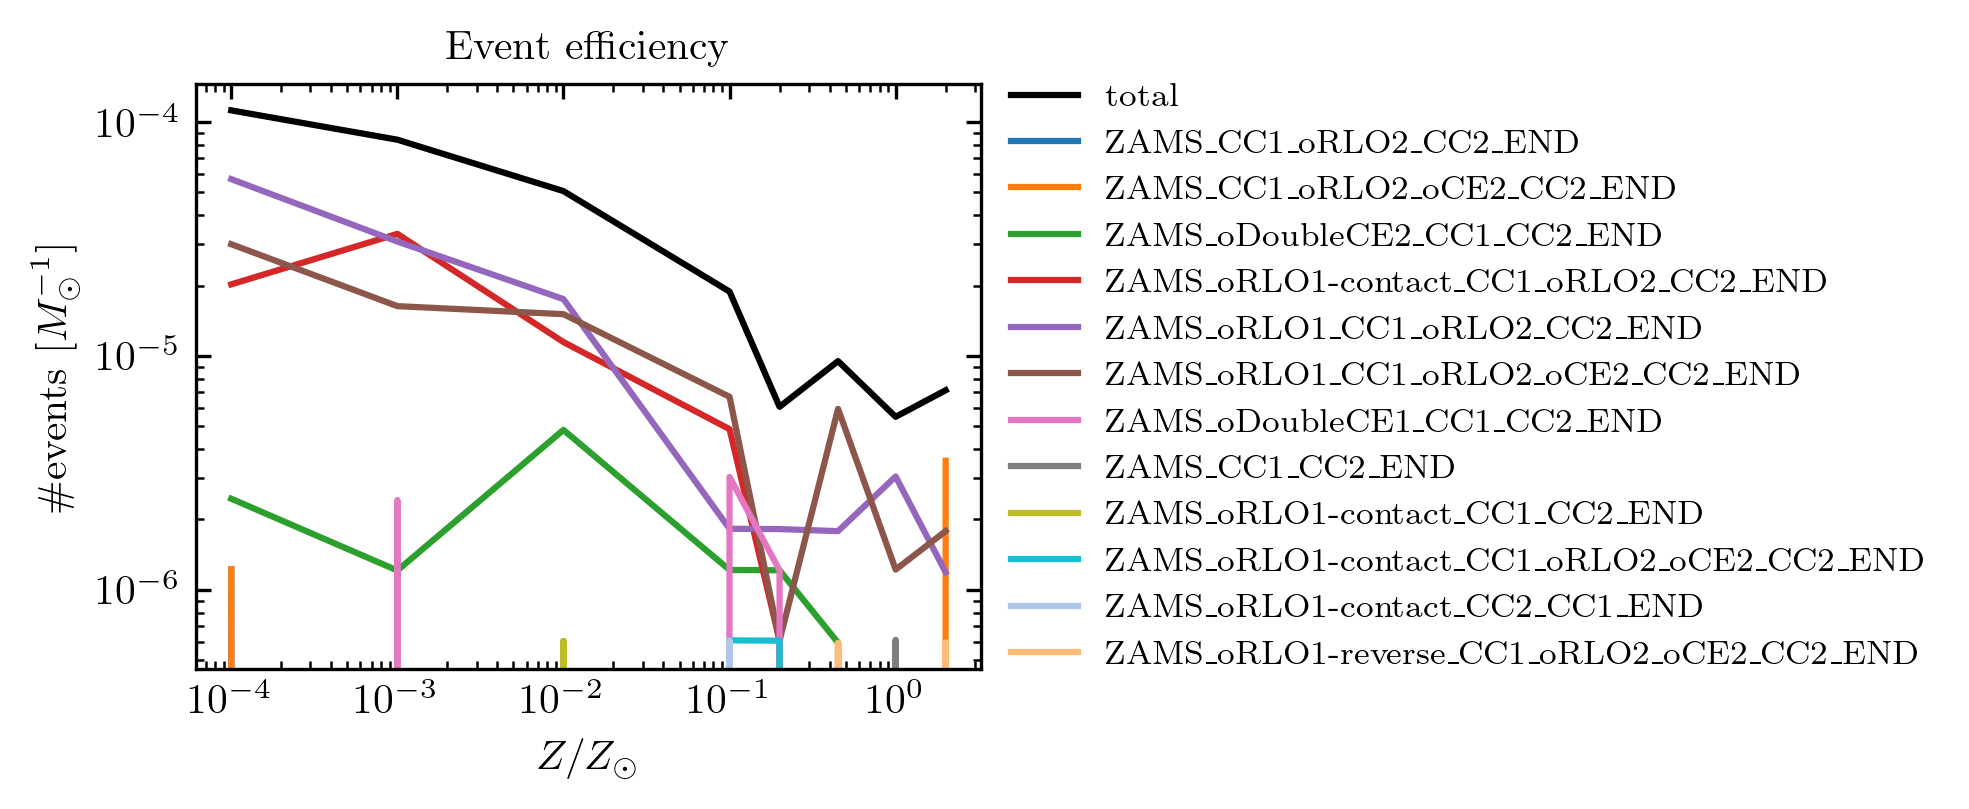

In [29]:
# if you want to plot the channels, you can set channels=True
BBH_mergers.plot_efficiency_over_metallicity(model_weight_identifier='extended_IMF',
                                             channels=True)

You might also be interested in seeing the evolution of the binary in more detail.

For this, you can plot the TransientPopulation over a grid slice.
For example, below we plot binaries over the $q=0.7$ slice at $Z=10^{-4} Z_\odot$ on the HMS-HMS grid.

If no slice is given, all mass ratios are plotted.

You can also plot a property from the `TransientPopulation.population` DataFrame as a colormap.
And specific formation_channels if they're in the DataFrame.

In [30]:
BBH_mergers.plot_popsyn_over_grid_slice('HMS-HMS', 1e-4, slices=[0.7], save_fig=False)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/max/Documents/POSYDON_popsynth_data/v2/250520_newSNe/POSYDON_data/HMS-HMS/1e-04_Zsun.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
BBH_mergers.plot_popsyn_over_grid_slice('HMS-HMS', 1e-4, slices=[0.7], prop='S1_spin', prop_range=[0,0.3], save_fig=False, channel='ZAMS_oRLO1_CC1_oRLO2_CC2_END') # SMT channel


-----

## Cosmic Rate

So far these events do not consider the metallicity or star formation rate evolution of the Universe.

POSYDON comes with several built-in star formation histories and metallicity evolutions, a few examples are:

- IllustrisTNG
- Neijssel2019
- Madau+Fragos2017

We can apply these to our population with the `calculate_cosmic_weights` function.
Here, we will use the metallicity and SFR evolution of the IllustrisTNG, which is the default model used, if no `MODEL_in` is given.

The function returns an instance of the `Rates` class, which gives us access to some new variables:


- `z_birth`: the redshift and age of the universe at which we probe the star formation
- `z_events`: the redshift at which an event takes place
- `weights`: the weight of the event based on the SFR, its metallicity, and its weight in the population.

In [31]:
from posydon.popsyn.synthetic_population import TransientPopulation
BBH_mergers = TransientPopulation(filename='BBH_contact.h5', transient_name='BBH')

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


In [32]:
MODEL = {
    'delta_t' : 100, # Myr
    'SFR' : 'IllustrisTNG', # Neijssel2019, Madau+Fragos2017
    'sigma_SFR' : None,
}


rates = BBH_mergers.calculate_cosmic_weights('IllustrisTNG',
                                             model_weights='extended_IMF', # we need to specify the weights we calculated before
                                             MODEL_in=MODEL)

Missing ini parameter: orbital_separation_scheme
Missing ini parameter: orbital_separation_min
Missing ini parameter: orbital_separation_max


FileNotFoundError: [Errno 2] No such file or directory: '/Users/max/Documents/POSYDON_popsynth_data/v2/250520_newSNe/POSYDON_data/SFR/IllustrisTNG.npz'

In [ ]:
rates.z_birth.head(2)

In [ ]:
rates.z_events.head(2)

In [ ]:
rates.weights.head(2)

Similar to the `TransientPopulation`, the rates can also be accessed using the `Rates` class. You will need to provide your `transient_name` and `SFH_identifier`.
These rates are also stored in the file. You can have as many transients and star formation histories in your population file as you want.

In [ ]:
from posydon.popsyn.synthetic_population import Rates

rates = Rates(filename='BBH_contact.h5', transient_name='BBH', SFH_identifier='IllustrisTNG')

You can directly work with the weights and the z_events to get events at specific redshifts.

Or you can calculate the rate density over redshift using the `calculate_intrinsic_rate_density` function.
This will calculate the rate over redshift for you.

You can use the output of the function immediately, or get them from `rates.intrinsic_rate_density`.

In [ ]:
out = rates.calculate_intrinsic_rate_density(channels=True)

In [ ]:
rates.intrinsic_rate_density

In [ ]:
rates.plot_intrinsic_rate(channels=True, xlim=(0,10), ylim=(1e-2,1e3))

### Properties of the systems

Sometimes you might want some more details about the actual population and its properties.

`plot_hist_properties()` allows you to plot these.

By default, the function will create its own figure and plot it. If you would like more control over the output, you can give it your own pyplot axis and set `show=False`.
This allows you to adapt and change the plot to your liking after finishing adding the properties.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0,100,101)
fig, ax = plt.subplots(1,1)
rates.plot_hist_properties('S1_mass', intrinsice=True, bins=bins, color='red', ax =ax, label='S1', show=False)
rates.plot_hist_properties('S2_mass', intrinsice=True, bins=bins, ax=ax, label='S2', show=False)

ax.set_ylabel('Rate density [Gpc$^-3$ yr$^-1$]')
ax.set_xlabel('Mass [Msun]')
ax.legend()
plt.show()

### Observable population

Sometimes, however, you're not just interested in the intrinsic population, and want an observable population.
This could be a supernova detection fraction for a telescope survey, or the LVK detection efficiency for GW mergers.

You can apply these using `calculate_observable_population`. Similar to the `create_transient_population`, this function takes a `observable_func`, which describes the observability of a transient.

An `observable_func` takes chunks of

1. `TransientPopulation.population`
2. The `TransientPopulation.z_events`
3. The `TransientPopulation.weights`

Using these, new weights are calculated and stored as a separate observable population of your TransientPopulation.
The BBH analysis framework comes with a detection function for several detector sensitivities and configurations.

In [ ]:
from posydon.popsyn.transient_select_funcs import DCO_detectability

In [ ]:
def DCO_wrapper(transient_chunk, z_events_chunk, weights_chunk):
    sensitivity = 'design_H1L1V1'
    return DCO_detectability(sensitivity, transient_chunk, z_events_chunk, weights_chunk, verbose=False)

In [ ]:
# We also give it a name, which is used as an identifier in the file
rates.calculate_observable_population(DCO_wrapper, 'design_H1L1V1')

In [ ]:
# We can now access this observable population
rates.observable_population('design_H1L1V1')

You can also plot the intrinsic and observable population together.

In [ ]:
bins = np.linspace(0,100,101)
fig, ax = plt.subplots(1,1)

rates.plot_hist_properties('S1_mass', intrinsice=True, observable='design_H1L1V1', bins=bins, ax = ax, label='S1', show=False)
ax.set_ylabel('Rate density [Gpc$^-3$ yr$^-1$]')
ax.set_xlabel('Mass [Msun]') 
ax.legend()
plt.show()

Congratulations, you are now ready to analyze any DCO population data you generated with POSYDON. Feel free to further explore the BBH model or to use this tutorial to study other populations.
The next tutorials show you how to [select GRBs](lgrb_pop_syn.ipynb), perform a [SFH calculation at a single metallicity](one_met_pop_syn.ipynb), and [how to run an individual binary](evolve_single_binaries.ipynb).